In [1]:
import pandas as pd
import sklearn as scikit
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Initialize data to be from the excel sheet
file_name = "default of credit card clients.xls"
raw_data = pd.read_excel(file_name)

In [3]:
print(raw_data)

      Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0     

NOTE: Our original data has the labels underneath arbitrary x1,x2,...xn labels. We will omit fix the formate of the dataframe first to have the proper labels in the dataframe.

In [4]:
# Format of data frame is configured incorrectly. We will fix format here...
# Fixing the dataframes labels...
raw_data.columns = raw_data.iloc[0]
# Removing labels from being within the dataframe...
raw_data = raw_data.iloc[1:,:]
#Removing first column ID from within the dataframe as not relevent to our models
raw_data = raw_data.iloc[:,1:]


raw_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Now with our data initialized, lets take a moment to explore the distribution of our classes

In [5]:
# Define a function to plot the distribution of a column
def plot_distribution(df, column):
    # Get the number of unique values in the column
    num_unique_values = df[column].nunique()
    df[column].hist(bins=num_unique_values, figsize=(10,5))
    plt.xlabel(column)
    plt.ylabel('Number of people')
    plt.title(f'Distribution of {column}')
    plt.show()

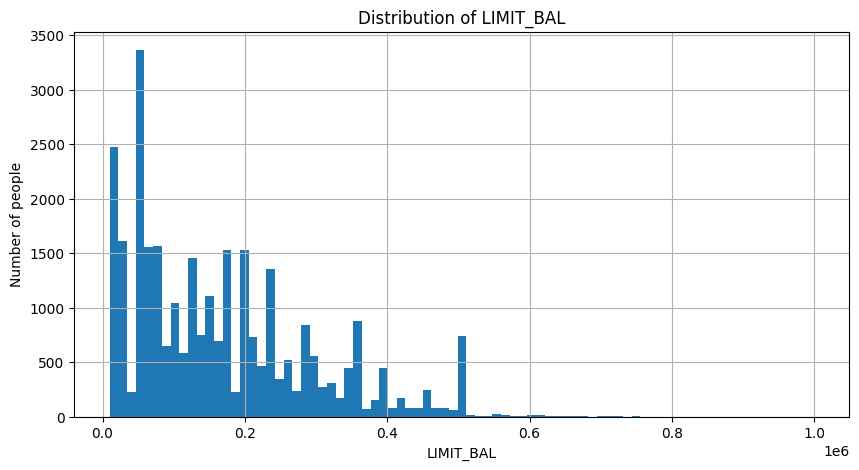

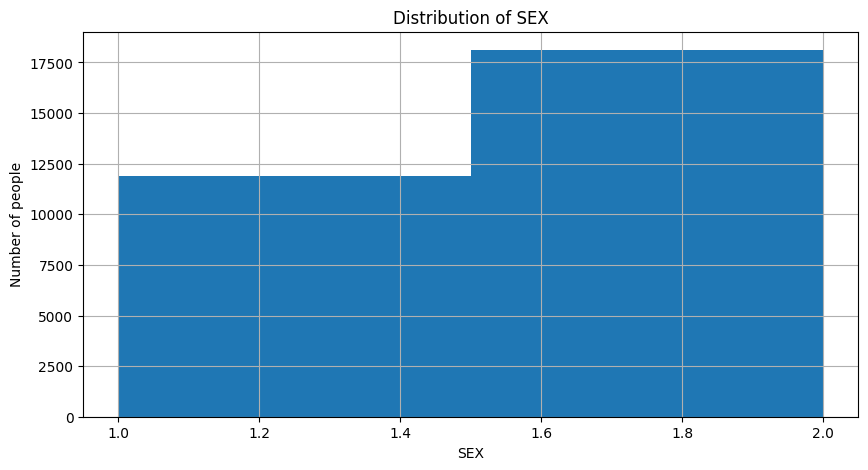

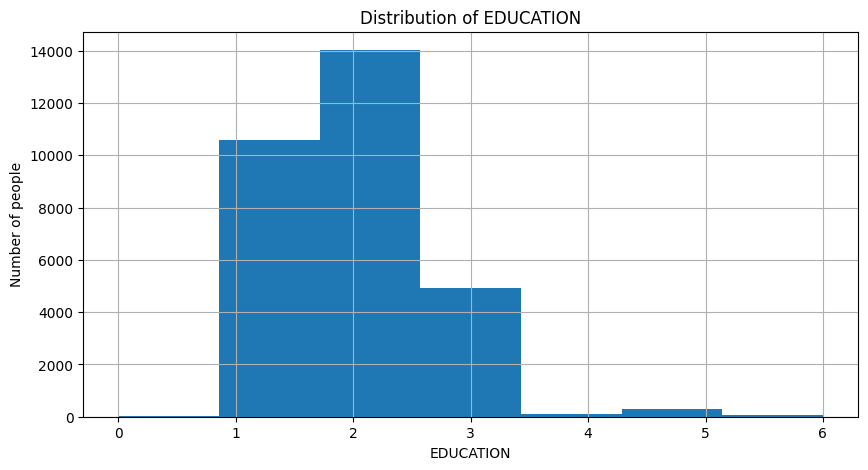

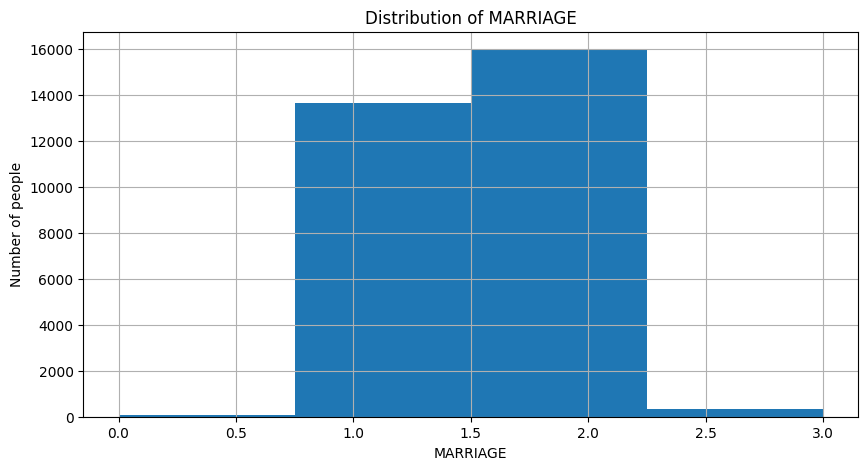

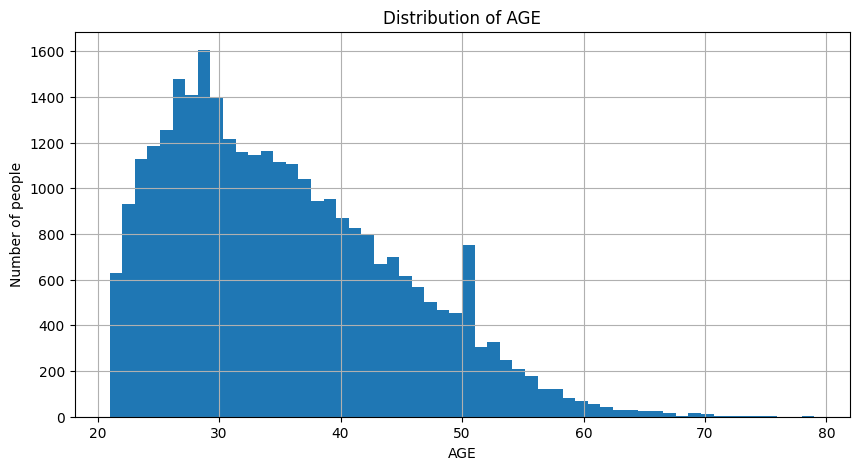

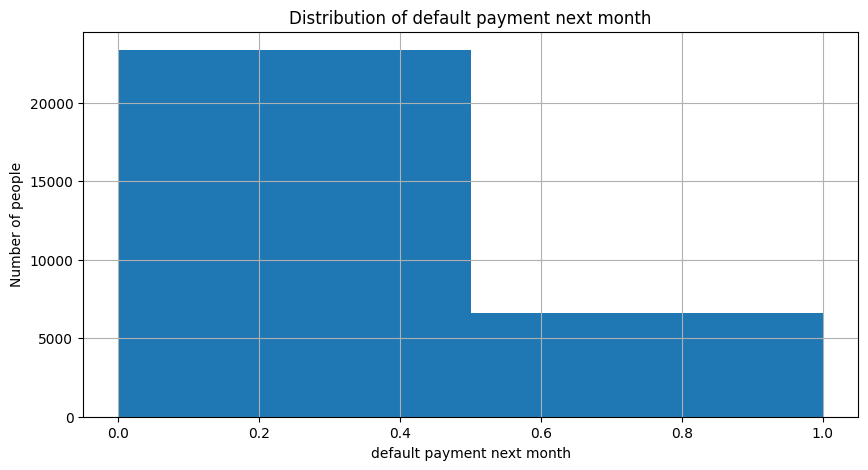

In [6]:
plot_distribution(raw_data, 'LIMIT_BAL') # limit_balance
plot_distribution(raw_data, 'SEX') # sex
plot_distribution(raw_data, 'EDUCATION') # Education
plot_distribution(raw_data, 'MARRIAGE') # Marriage
plot_distribution(raw_data, 'AGE') # Age
plot_distribution(raw_data, 'default payment next month') #default

We can see that our data is imbalanced and has a skewed nature to it. We should try different methods to get a better representation to work on. However, for now let us work with the entire data frame to gain a reference.

Let us do simple preprocessing to get our split datasets ready.

In [7]:
from sklearn.model_selection import train_test_split

# Assuming raw_data is your DataFrame and `defalut payment next month` is the target variable
X = raw_data.drop('default payment next month', axis=1)
y = raw_data['default payment next month']

# Split the data into training, validation, and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Split the training set into demographic and time series data
X_demographic_train = X_train[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_train = X_train.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)

# Reshape time series training data to be 3D for the LSTM (samples, timesteps, features)
X_time_series_train = X_time_series_train.values.reshape(X_time_series_train.shape[0], X_time_series_train.shape[1], 1)

# Do the same for the validation set
X_demographic_val = X_val[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_val = X_val.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_val = X_time_series_val.values.reshape(X_time_series_val.shape[0], X_time_series_val.shape[1], 1)

# And the test set
X_demographic_test = X_test[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_test = X_test.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_test = X_time_series_test.values.reshape(X_time_series_test.shape[0], X_time_series_test.shape[1], 1)

In [8]:
# Convert the frame to float32 to work with neural networks
X_time_series_train = X_time_series_train.astype('float32')
X_demographic_train = X_demographic_train.astype('float32')
X_time_series_val = X_time_series_val.astype('float32')
X_demographic_val = X_demographic_val.astype('float32')
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

X_time_series_test = X_time_series_test.astype('float32')
X_demographic_test = X_demographic_test.astype('float32')
y_test = y_test.astype('float32')


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN

In [10]:
# Define the model: This will be LSTM using all data...
model = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model.add(LSTM(units=50, dropout=0.2, input_shape=(X_time_series_train.shape[1], 1)))

# Add Dense layer for demographic data
model.add(Dense(units=X_demographic_train.shape[1]))

# Add final Dense layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7885 - loss: 0.4968 - val_accuracy: 0.8085 - val_loss: 0.4548
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7993 - loss: 0.4707 - val_accuracy: 0.7897 - val_loss: 0.4663
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7952 - loss: 0.4688 - val_accuracy: 0.7900 - val_loss: 0.4620
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7837 - loss: 0.4964 - val_accuracy: 0.8045 - val_loss: 0.4535
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7900 - loss: 0.4972 - val_accuracy: 0.7815 - val_loss: 0.5126
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7863 - loss: 0.5030 - val_accuracy: 0.7813 - val_loss: 0.5201
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7820 - loss: 0.5234 - val_accuracy: 0.7755 - val_loss: 0.5185
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7783 - loss: 0.5237 - val_accuracy: 0.7818 - val_

In [11]:
# Define the model: This will be RNN using all data...
model2 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model2.add(SimpleRNN(units=50, dropout=0.2, input_shape=(X_time_series_train.shape[1], 1)))

# Add Dense layer for demographic data
model2.add(Dense(units=X_demographic_train.shape[1]))

# Add final Dense layer for binary classification
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model2.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7565 - loss: 0.5543 - val_accuracy: 0.7777 - val_loss: 0.5295
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7741 - loss: 0.5345 - val_accuracy: 0.7818 - val_loss: 0.5205
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7814 - loss: 0.5243 - val_accuracy: 0.7818 - val_loss: 0.5229
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7799 - loss: 0.5271 - val_accuracy: 0.7818 - val_loss: 0.5220
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7745 - loss: 0.5350 - val_accuracy: 0.7818 - val_loss: 0.5225
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7790 - loss: 0.5270 - val_accuracy: 0.7818 - val_loss: 0.5192
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7794 - loss: 0.5277 - val_accuracy: 0.7818 - val_loss: 0.5215
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7789 - loss: 0.5281 - val_accuracy: 0.7818 - val_

In [12]:
# Define the model: This will be LSTM using time-series only...
model3 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model3.add(LSTM(units=50, dropout=0.2, input_shape=(X_time_series_train.shape[1], 1)))

# Add Dense layer for binary classification
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model3.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7877 - loss: 0.5107 - val_accuracy: 0.8067 - val_loss: 0.4517
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8023 - loss: 0.4674 - val_accuracy: 0.8082 - val_loss: 0.4498
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8037 - loss: 0.4659 - val_accuracy: 0.8083 - val_loss: 0.4464
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8051 - loss: 0.4639 - val_accuracy: 0.8097 - val_loss: 0.4499
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8098 - loss: 0.4586 - val_accuracy: 0.8090 - val_loss: 0.4528
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8057 - loss: 0.4646 - val_accuracy: 0.8090 - val_loss: 0.4493
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8048 - loss: 0.4659 - val_accuracy: 0.7923 - val_loss: 0.4611
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7888 - loss: 0.4792 - val_accuracy: 0.7912 - val_

In [13]:
# Define the model: This will be RNN using time-series only...
model4 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model4.add(SimpleRNN(units=50, dropout=0.2, input_shape=(X_time_series_train.shape[1], 1)))

# Add Dense layer for binary classification
model4.add(Dense(1, activation='sigmoid'))

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model4.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7719 - loss: 0.5511 - val_accuracy: 0.7817 - val_loss: 0.5210
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7773 - loss: 0.5283 - val_accuracy: 0.7817 - val_loss: 0.5201
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7798 - loss: 0.5257 - val_accuracy: 0.7818 - val_loss: 0.5231
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7879 - loss: 0.5163 - val_accuracy: 0.7818 - val_loss: 0.5235
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7786 - loss: 0.5267 - val_accuracy: 0.7820 - val_loss: 0.5249
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7790 - loss: 0.5280 - val_accuracy: 0.7818 - val_loss: 0.5252
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7710 - loss: 0.5372 - val_accuracy: 0.7818 - val_loss: 0.5203
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7788 - loss: 0.5268 - val_accuracy: 0.

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score #will be used to printInfo of models

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def printInfo(model):
    # Use the model to make predictions
    y_pred_prob = model.predict(X_time_series_test)

    # Apply a threshold to get strict 0 or 1 values
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Now compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = np.mean([cm[i,i]/(np.sum(cm[:,i])) for i in range(cm.shape[0])])

    # Print the metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Specificity: {specificity}")

    # Draw the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7911666666666667
Precision: 0.6466666666666666
Recall: 0.07478797224363917
Specificity: 0.7207692307692307


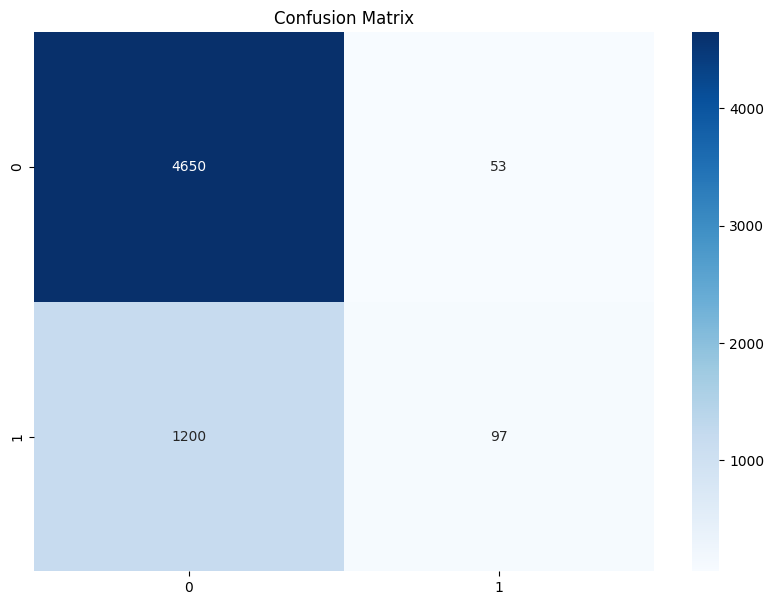

In [16]:
printInfo(model)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.7873333333333333
Precision: 0.8387096774193549
Recall: 0.020046260601387818
Specificity: 0.8128880938612941


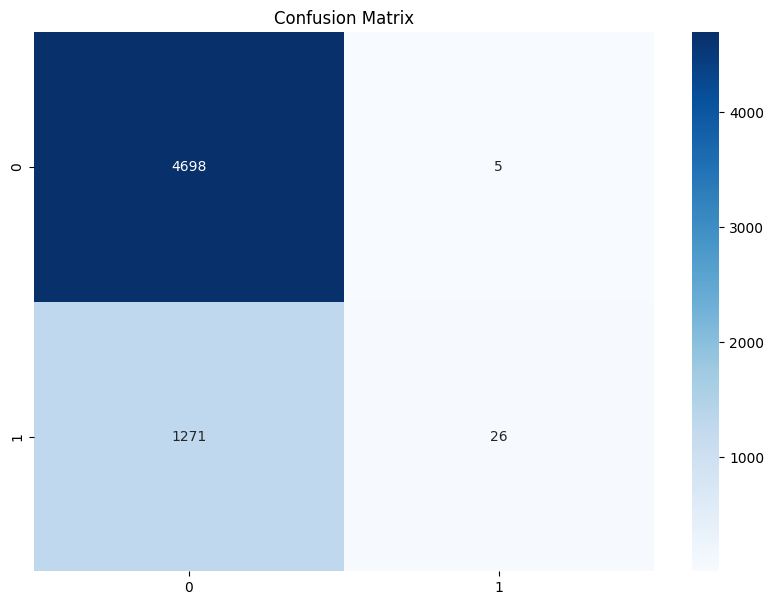

In [17]:
printInfo(model2)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8191666666666667
Precision: 0.6726384364820847
Recall: 0.3184271395528142
Specificity: 0.7542546062841169


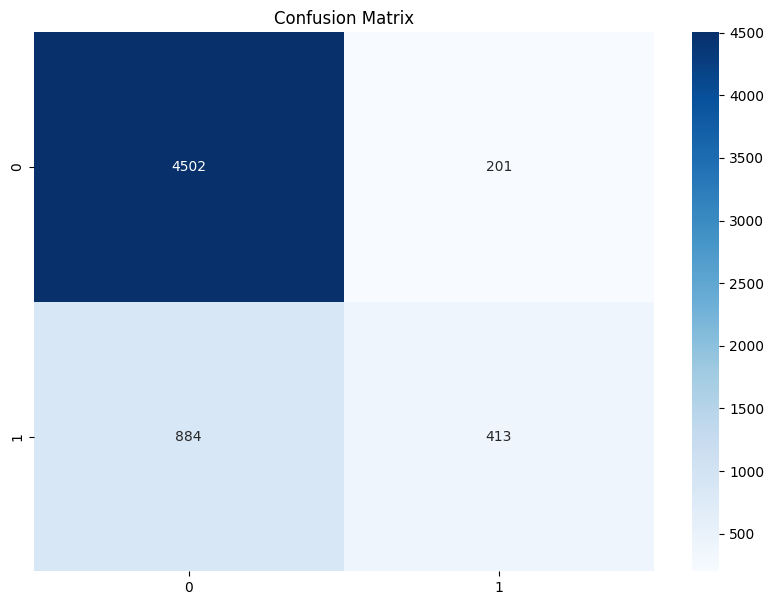

In [18]:
printInfo(model3)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.7873333333333333
Precision: 0.8387096774193549
Recall: 0.020046260601387818
Specificity: 0.8128880938612941


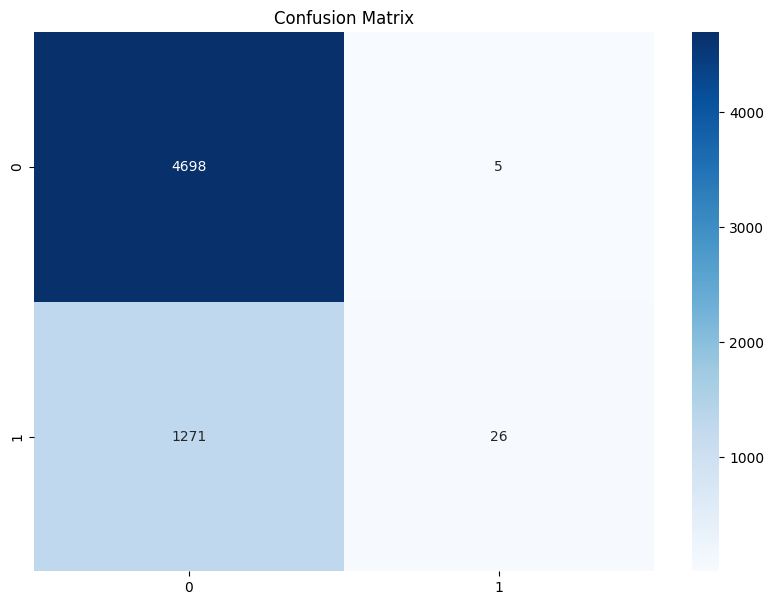

In [19]:
printInfo(model4)

# Let us try to get a good model based on relevent data only (i.e only time series)

Let us try to make the model more "focused" Lets have layers that look at the one-to-one relation prior to applying a relation overall datapoints.

In [20]:
from keras.layers import Bidirectional

# Define the model
biLSTM = Sequential()

# Add Bidirectional LSTM layer
# Adjust the units and dropout according to your data
biLSTM.add(Bidirectional(LSTM(units=50, dropout=0.2), input_shape=(X_time_series_train.shape[1], 1)))

# Add Dense layer for binary classification
biLSTM.add(Dense(1, activation='sigmoid'))

# Compile the model
biLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
biLSTM.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)


Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7901 - loss: 0.4872 - val_accuracy: 0.8095 - val_loss: 0.4524
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7976 - loss: 0.4636 - val_accuracy: 0.8032 - val_loss: 0.4573
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7958 - loss: 0.4616 - val_accuracy: 0.8057 - val_loss: 0.4513
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8004 - loss: 0.4575 - val_accuracy: 0.8103 - val_loss: 0.4459
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8034 - loss: 0.4585 - val_accuracy: 0.8092 - val_loss: 0.4520
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8038 - loss: 0.4546 - val_accuracy: 0.8113 - val_loss: 0.4455
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8023 - loss: 0.4590 - val_accuracy: 0.8117 - val_loss: 0.4428
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8069 - loss: 0.4573 - val_accuracy: 0.8147 - val_

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8181666666666667
Precision: 0.6650641025641025
Recall: 0.3199691595990748
Specificity: 0.7505008012820513


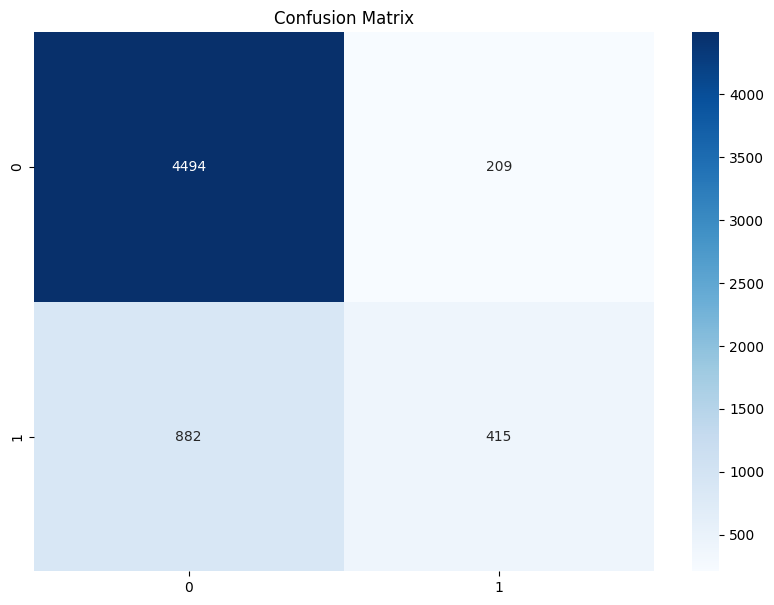

In [21]:
printInfo(biLSTM)